#### K-Means Clustering over 2 Dimensions
In this exercise, we experiment with K-Means clustering of two genres (k = 2) over 2 attributes (dim = 2). We use the Scikit Learn Clustering library to produce centroids for each genre and determine if there exists a natural clustering of genre. The genres we are working with are classical and rock. The attributes we choose to cluster over are energy $X$ and danceability $Y$. 

We then attempt to identify misclassified data points and add a description as to why they have been misclassifed.

In [13]:
import pandas as pd
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
attribute_names = list(total_df)[:-1]
x = total_df[attribute_names].values
y = total_df["Class"].values

original_x = np.copy(x)
original_y = np.copy(y)

In [15]:
def include_only(x, attribute_names, attribute_subset):
    excluded_columns = [i for i, attribute in enumerate(attribute_names) if attribute not in attribute_subset]
    return np.delete(x, excluded_columns, axis=1)

In [16]:
attribute_subset = ["danceability", "energy"]
print("Attributes we are considering:", attribute_subset)
x = include_only(original_x, attribute_names, attribute_subset)

Attributes we are considering: ['danceability', 'energy']


In [17]:
feature_a_indices =  np.where(y == "classical")[0]
feature_b_indices = np.where(y == "rock")[0]
feature_a_color = "cornflowerblue";
feature_b_color = "salmon";

attribute_names = np.array(attribute_names)
energy_attribute_index = np.where(attribute_names == "energy")[0][0]
danceability_attribute_index = np.where(attribute_names == "danceability")[0][0]

In [18]:
feature_indices = [*feature_a_indices, *feature_b_indices]

f1 = total_df["energy"].values[feature_indices]
f2 = total_df["danceability"].values[feature_indices]

X = np.array(list(zip(f1, f2))).reshape(len(f1), 2)

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

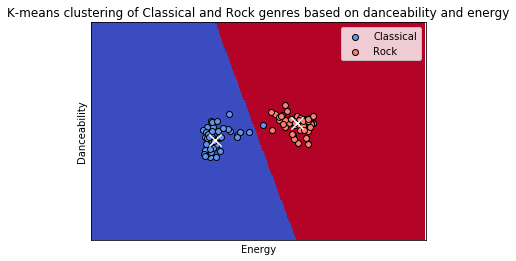

Genre labels were retroactively added after the KMeans learner was fit


In [20]:
step_size = .01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z,
           interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.get_cmap("coolwarm"),
           aspect="auto", origin="lower")

plt.scatter(original_x[feature_a_indices, energy_attribute_index],
            original_x[feature_a_indices, danceability_attribute_index],
            color=feature_a_color, edgecolor="k", label="Classical")

plt.scatter(original_x[feature_b_indices, energy_attribute_index],
            original_x[feature_b_indices, danceability_attribute_index],
            color=feature_b_color, edgecolor="k", label="Rock")

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=150, linewidths=10,
            color='w')

plt.title("K-means clustering of Classical and Rock genres based on danceability and energy")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print("Genre labels were retroactively added after the KMeans learner was fit")

In [9]:
predictions = kmeans.predict(X)

In [21]:
# Find attribute values of misclassification
Y = [*y[feature_a_indices], *y[feature_b_indices]]
for i, p in enumerate(predictions):
    y_p = Y[i]
    if (y_p == "classical" and p == 1) or (y_p == "rock" and p == 0):
        print("Misclassification energy attribute value:", X[i][0])
    
print("Mean energy attribute for classification: ", np.mean(x[feature_a_indices, 0]))

Misclassification energy attribute value: 0.532
Mean energy attribute for classification:  0.33165999999999995


As we can see from the k-means clustering figure, we misclassify one data point as genre "Rock" when it's actual genre is "Classical." This misclassification likely occurred its energy attribute is atypically high for classical music at 0.532, where the mean energy attribute for classification is ~0.33.